In [1]:
def MCP_Neurons_AND(X1, X2, T):
    """
    Implements basic AND operations with MCP Neuron for two inputs.

    Arguments:
      X1 (list): An array of binary values.
      X2 (list): An array of binary values.
      T (int): Threshold value.

    Returns:
      state_neuron (list): Output of the MCP neuron for each pair of inputs.
    """
    assert len(X1) == len(X2), "Input lists must have the same length"
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)
    return state_neuron

# Sample usage for AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value
result = MCP_Neurons_AND(X1, X2, T)
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    Implements basic OR operations with MCP Neuron for two inputs.

    Arguments:
      X1 (list): An array of binary values.
      X2 (list): An array of binary values.
      T (int): Threshold value.

    Returns:
      state_neuron (list): Output of the MCP neuron for each pair of inputs.
    """
    assert len(X1) == len(X2), "Input lists must have the same length"
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)
    return state_neuron

X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
result_or = MCP_Neurons_OR(X1, X2, T)
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


### Questions on MCP Neurons

1. **Limitations of MCP-Neurons:**
   - **Simplistic Model:** It only uses binary inputs and outputs.
   - **No Learning:** There is no mechanism to adjust weights or adapt over time.
   - **Linear Decision Boundary:** It cannot solve problems like XOR that require non-linear separation.
   - **Biological Inaccuracy:** It oversimplifies the complex behavior of real neurons.

2. **Logic for XOR using MCP Neuron (if/else rules):**
   - Since XOR cannot be implemented by a single MCP neuron (due to its linear nature), you can design it using a combination of MCP neurons:
     - **Rule:** \( \text{XOR}(A, B) = (A \text{ OR } B) \text{ AND } \text{NOT}(A \text{ AND } B) \)
     - You could build this by:
       - Using one MCP neuron for the OR operation.
       - One for the AND operation.
       - One for the NOT operation.
       - Then combine their outputs with another MCP neuron to produce the final XOR output.



In [2]:
import pandas as pd
import numpy as np

df_0_1 = pd.read_csv("/content/mnist_0_and_1.csv")

X = df_0_1.drop(columns=["label"]).values
y = df_0_1["label"].values
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


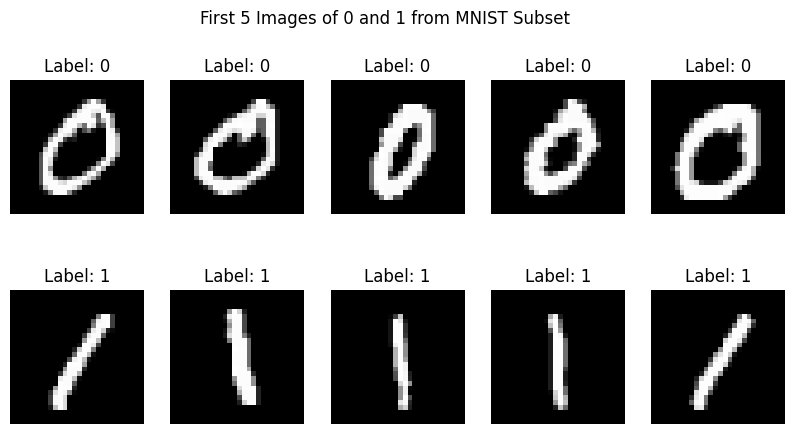

In [3]:
import matplotlib.pyplot as plt

images_0 = X[y == 0]
images_1 = X[y == 1]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images to plot 5 for each label.")
else:
    for i in range(5):
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")

        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")

plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
plt.show()


In [4]:
weights = np.zeros(X.shape[1])
bias = 0
learning_rate = 0.1
epochs = 100

print("Weights shape:", weights.shape)
print("Initial bias:", bias)


Weights shape: (784,)
Initial bias: 0


In [5]:
def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
      X (np.array): Input features of shape (n_samples, n_features).
      weights (np.array): Trained weights.
      bias (float): Trained bias.

    Returns:
      y_pred_all (np.array): Predicted binary labels.
    """
    z = np.dot(X, weights) + bias
    y_pred_all = np.where(z >= 0, 1, 0)
    return y_pred_all

print("Decision function test:", decision_function(X[:5], weights, bias))


Decision function test: [1 1 1 1 1]


In [6]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
      X (np.array): Input data of shape (n_samples, n_features).
      y (np.array): True labels (0 or 1) of shape (n_samples,).
      weights (np.array): Initial weights.
      bias (float): Initial bias.
      learning_rate (float): Learning rate.
      epochs (int): Number of iterations.

    Returns:
      weights (np.array): Updated weights after training.
      bias (float): Updated bias after training.
      accuracy (float): Final accuracy on training data.
    """
    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0
        for i in range(n_samples):
            output = np.dot(X[i], weights) + bias
            y_pred = 1 if output >= 0 else 0

            if y_pred != y[i]:
                update = learning_rate * (y[i] - y_pred)
                weights = weights + update * X[i]
                bias = bias + update
            else:
                correct_predictions += 1

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Accuracy: {correct_predictions/n_samples:.4f}")

    y_pred_all = decision_function(X, weights, bias)
    accuracy = np.mean(y_pred_all == y)
    return weights, bias, accuracy

weights, bias, accuracy = train_perceptron(X, y, weights, bias, learning_rate, epochs)
print("The Final Accuracy is:", accuracy)


Epoch 10/100 - Accuracy: 0.9992
Epoch 20/100 - Accuracy: 1.0000
Epoch 30/100 - Accuracy: 1.0000
Epoch 40/100 - Accuracy: 1.0000
Epoch 50/100 - Accuracy: 1.0000
Epoch 60/100 - Accuracy: 1.0000
Epoch 70/100 - Accuracy: 1.0000
Epoch 80/100 - Accuracy: 1.0000
Epoch 90/100 - Accuracy: 1.0000
Epoch 100/100 - Accuracy: 1.0000
The Final Accuracy is: 1.0


In [7]:
y_pred = decision_function(X, weights, bias)
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

misclassified_idx = np.where(y_pred != y)[0]
print("Number of misclassified images:", len(misclassified_idx))

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


Final Accuracy: 1.0000
Number of misclassified images: 0
All images were correctly classified!


### Perceptron Questions Answers

1. **Question 3: What does the weights array represent?**  
   The weights array represents the strength of each feature (pixel) in making the prediction. Each element corresponds to one pixel in the image.

2. **Question 4: Why initialize weights to zero?**  
   Initializing weights to zero provides a starting point. However, starting at zero may slow down learning or lead to symmetry issues. Sometimes random small values are preferred.

3. **Question 5: Purpose of `output = np.dot(X[i], weights) + bias`?**  
   This line calculates the weighted sum of inputs plus bias, which is used to decide whether the perceptron fires (predicts 1) or not (predicts 0).

4. **Question 6: What happens when the prediction is wrong?**  
   When the prediction is wrong, the weights and bias are updated using the rule:  
   \[
   \Delta w_j = \eta \times (y - \hat{y}) \times x_j
   \]  
   and similarly for the bias. This adjustment reduces the error for that sample.

5. **Question 7: Why is the final accuracy important? What do you expect it to be?**  
   Final accuracy shows how well the perceptron learned the task. For a simple binary problem (0 vs 1), high accuracy is expected if the data is linearly separable.

6. **Question 8: What does `misclassified_idx` store and how is it used?**  
   `misclassified_idx` stores the indices of samples where the prediction did not match the true label. It is used to visualize and analyze the errors.

7. **Question 9: How do you interpret "All images were correctly classified!"?**  
   It indicates that the perceptron model has correctly predicted every image in the training dataset.



Feature matrix shape (3 vs 5): (2741, 784)
Label vector shape (3 vs 5): (2741,)
Epoch 10/100 - Accuracy: 0.9566
Epoch 20/100 - Accuracy: 0.9661
Epoch 30/100 - Accuracy: 0.9726
Epoch 40/100 - Accuracy: 0.9719
Epoch 50/100 - Accuracy: 0.9788
Epoch 60/100 - Accuracy: 0.9759
Epoch 70/100 - Accuracy: 0.9792
Epoch 80/100 - Accuracy: 0.9792
Epoch 90/100 - Accuracy: 0.9843
Epoch 100/100 - Accuracy: 0.9858
Final Accuracy for 3 vs 5: 0.986866107260124
Final Accuracy (3 vs 5): 0.9869
Number of misclassified images (3 vs 5): 36


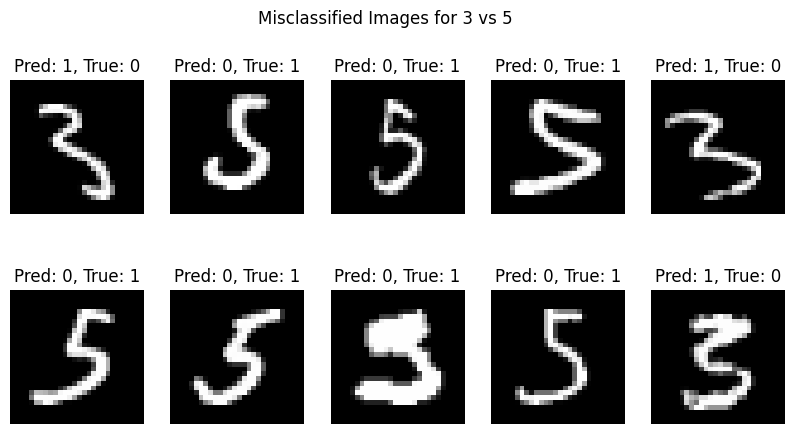

In [9]:
df_3_5 = pd.read_csv("/content/mnist_3_and_5.csv")
X_35 = df_3_5.drop(columns=["label"]).values
y_35 = df_3_5["label"].values

print("Feature matrix shape (3 vs 5):", X_35.shape)
print("Label vector shape (3 vs 5):", y_35.shape)

y_35 = np.where(y_35 == 3, 0, 1)

weights_35 = np.zeros(X_35.shape[1])
bias_35 = 0
learning_rate = 0.1
epochs = 100

weights_35, bias_35, accuracy_35 = train_perceptron(X_35, y_35, weights_35, bias_35, learning_rate, epochs)
print("Final Accuracy for 3 vs 5:", accuracy_35)

y_pred_35 = decision_function(X_35, weights_35, bias_35)
final_accuracy_35 = np.mean(y_pred_35 == y_35)
print(f"Final Accuracy (3 vs 5): {final_accuracy_35:.4f}")

misclassified_idx_35 = np.where(y_pred_35 != y_35)[0]
print("Number of misclassified images (3 vs 5):", len(misclassified_idx_35))

if len(misclassified_idx_35) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx_35[:10]):
        ax.imshow(X_35[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred_35[idx]}, True: {y_35[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images for 3 vs 5")
    plt.show()
else:
    print("All images were correctly classified for 3 vs 5!")
